In [34]:
import pandas as pd 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
df = pd.read_csv("Dataset/spotify_dataset.csv")

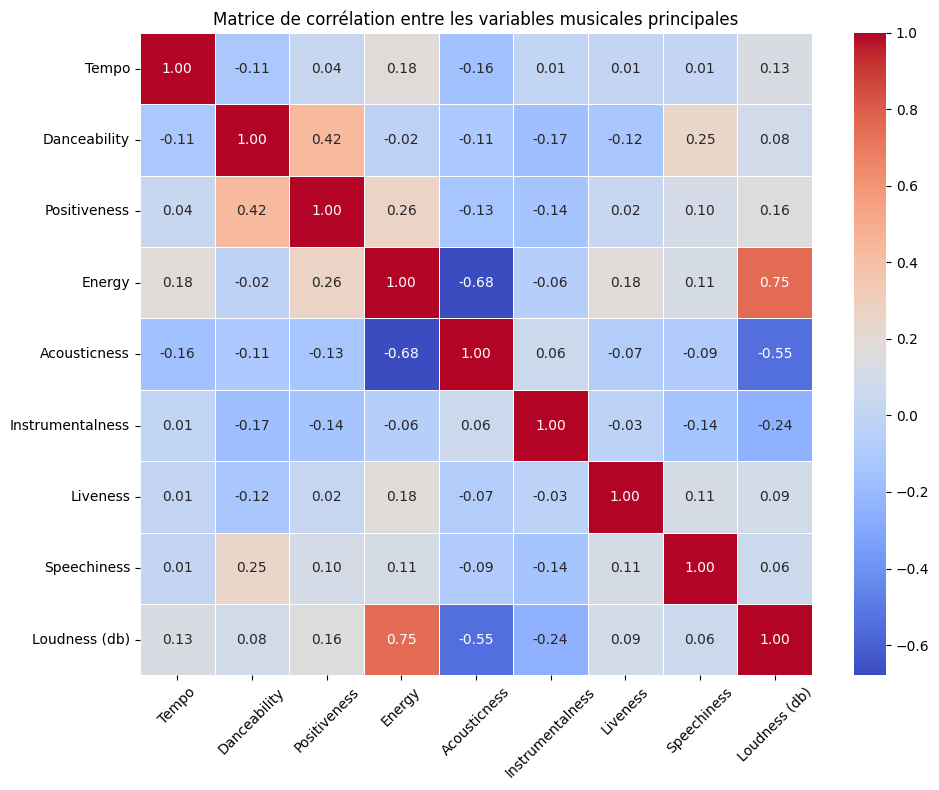

In [36]:
audio_features = [
    'Tempo', 'Key', 'Danceability', 'Positiveness', 'Energy',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness',
    'Loudness (db)'
]

# Calcul de la matrice de corrélation
corr_matrix = df[audio_features].corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les variables musicales principales")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

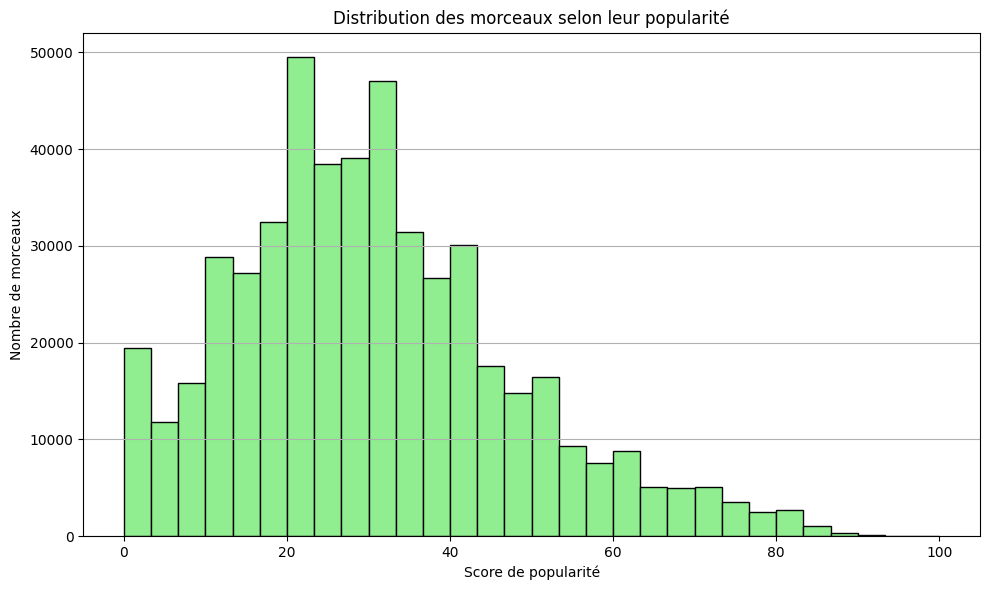

In [37]:
# Créer un histogramme de la popularité
plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'].dropna(), bins=30, edgecolor='black', color='lightgreen')
plt.title("Distribution des morceaux selon leur popularité")
plt.xlabel("Score de popularité")
plt.ylabel("Nombre de morceaux")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

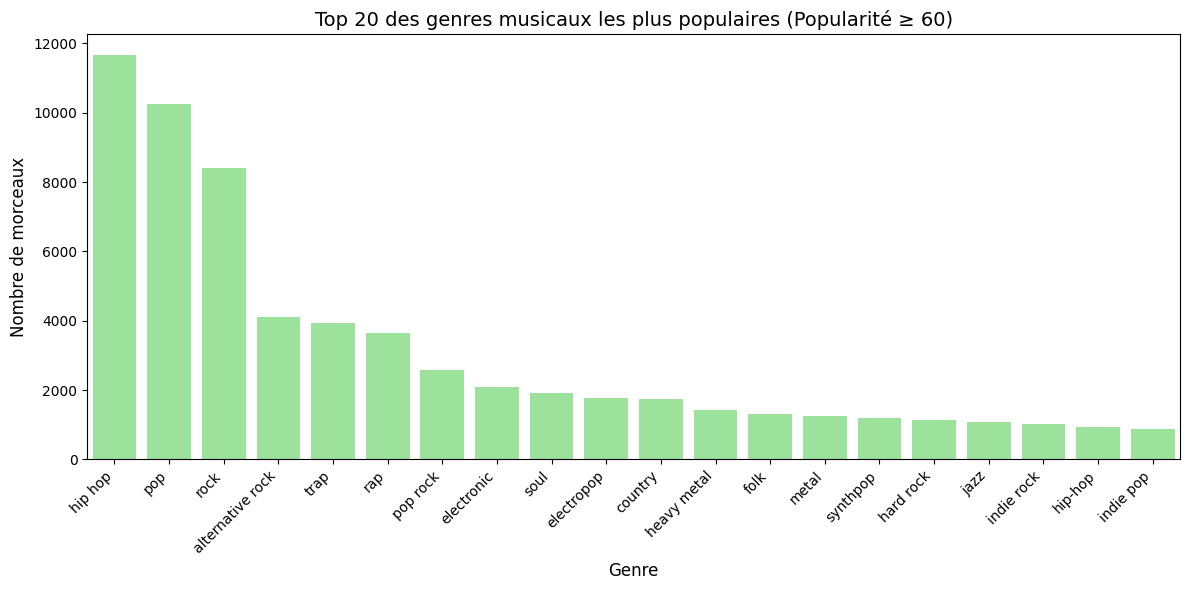

In [38]:
# Charger les données
df_highpop = df[df["Popularity"] >= 60]
df_expanded = df.assign(Genre=df_highpop['Genre'].str.split(',')).explode('Genre') # Séparer les genres multiples en plusieurs lignes
df_expanded['Genre'] = df_expanded['Genre'].str.strip()
top_20_genres = df_expanded['Genre'].value_counts().nlargest(20) # Compter les occurrences de chaque genre

# Tracer l'histogramme
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_genres.index, y=top_20_genres.values,color='lightgreen')
plt.title("Top 20 des genres musicaux les plus populaires (Popularité ≥ 60)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de morceaux", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

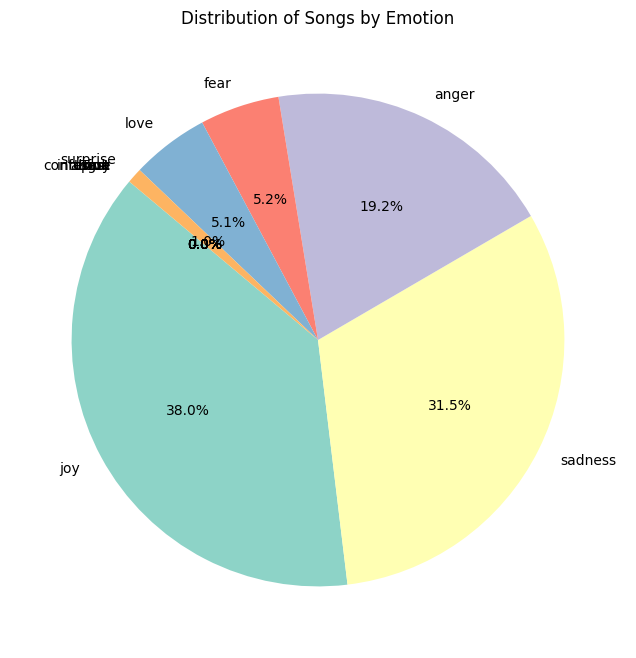

In [39]:
# Pie chart for emotion distribution
emotion_counts = df['emotion'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Distribution of Songs by Emotion')
plt.show()

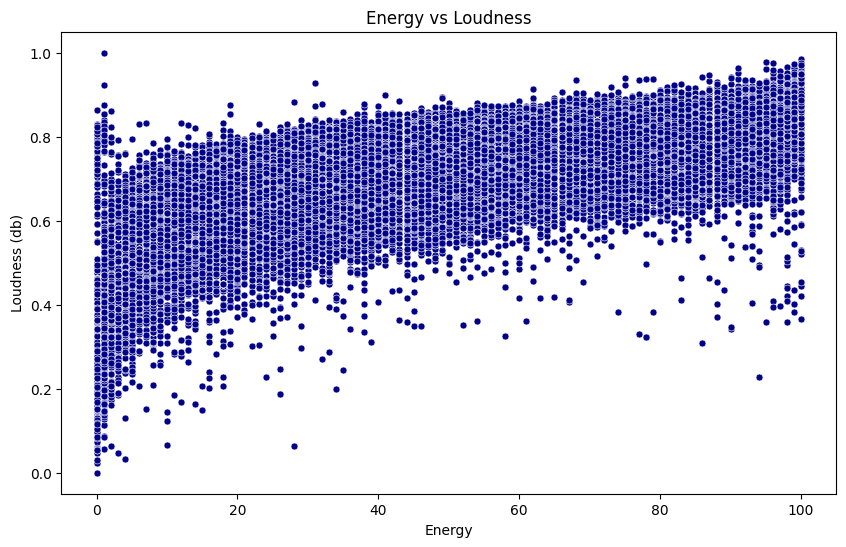

In [40]:
#Scatter plot de Energy vs Loudness ( variables trés dépendantes )

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy', y='Loudness (db)', data=df, color='darkblue',s=25)
plt.title('Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness (db)')
plt.show()

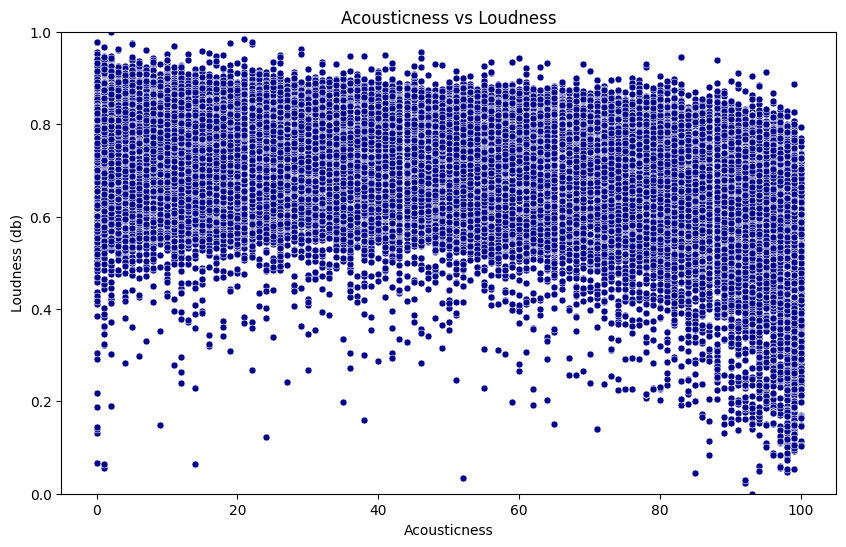

In [41]:
#Scatter plot de Acousticness vs Loudness ( variables trés dépendantes )

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acousticness', y='Loudness (db)', data=df, color='darkblue',s=25)
plt.title('Acousticness vs Loudness')
plt.xlabel('Acousticness')
plt.ylim(0,1)
plt.ylabel('Loudness (db)')
plt.show()

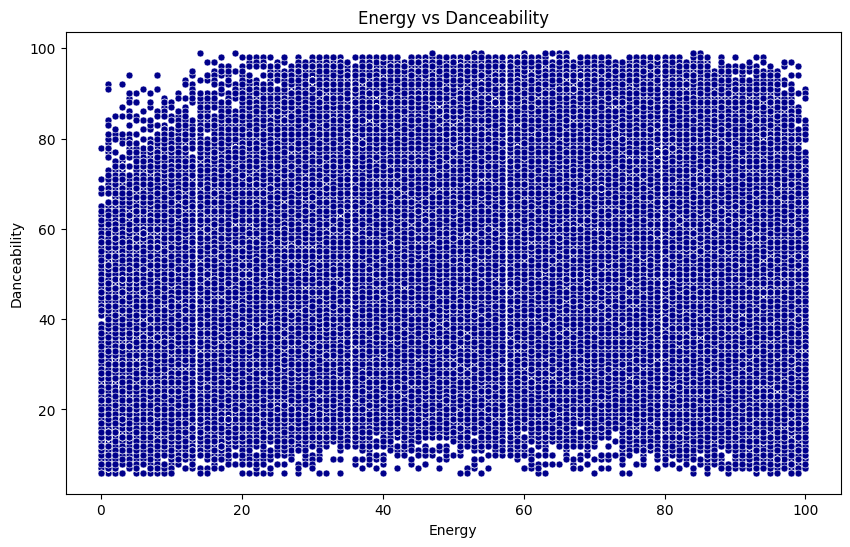

In [42]:
#Scatter plot de Energy vs Danceability ( variables Indépendantes )

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy', y='Danceability', data=df, color='darkblue',s=25)
plt.title('Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

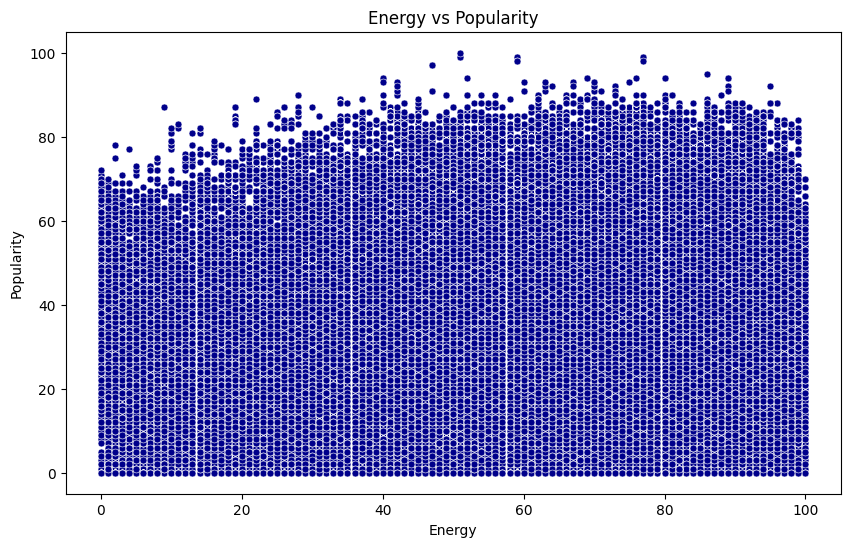

In [43]:
#Scatter plot de Energy vs Danceability ( variables Indépendantes )

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy', y='Popularity', data=df, color='darkblue',s=25)
plt.title('Energy vs Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

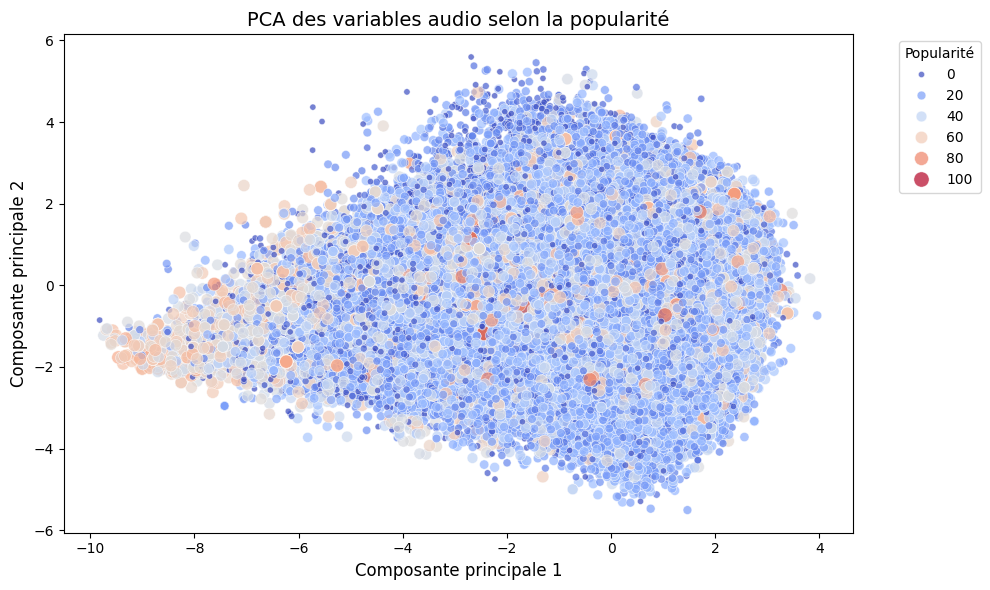

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Convertir la colonne 'Key' en entier avec un mapping
musical_keys = {
    'C Maj': 0, 'C# Maj': 1, 'D Maj': 2, 'D# Maj': 3, 'E Maj': 4, 'F Maj': 5,
    'F# Maj': 6, 'G Maj': 7, 'G# Maj': 8, 'A Maj': 9, 'A# Maj': 10, 'B Maj': 11,
    'C min': 0, 'C# min': 1, 'D min': 2, 'D# min': 3, 'E min': 4, 'F min': 5,
    'F# min': 6, 'G min': 7, 'G# min': 8, 'A min': 9, 'A# min': 10, 'B min': 11
}
df['Key'] = df['Key'].map(musical_keys)

# Supprimer les lignes avec Key ou autres colonnes manquantes
features = ['Tempo', 'Key', 'Danceability', 'Positiveness', 'Energy',
            'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness', 'Loudness (db)']
df_clean = df.dropna(subset=features + ['Popularity'])

# Séparer X et y
X = df_clean[features]
y = df_clean['Popularity']

# Standardiser les données
X_scaled = StandardScaler().fit_transform(X)

# Appliquer la PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=y, 
    palette='coolwarm', 
    size=y, 
    sizes=(20, 120), 
    alpha=0.7
)
plt.title("PCA des variables audio selon la popularité", fontsize=14)
plt.xlabel("Composante principale 1", fontsize=12)
plt.ylabel("Composante principale 2", fontsize=12)
plt.legend(title="Popularité", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Tranformation des Dataset

### Spotify_dataset_transformed

In [48]:
#--------------FONCTIONS UTILITAIREs---------------------

def length_to_seconds(length):
    if pd.notna(length):
        parts = str(length).split(":")
        if len(parts) == 2:
            minutes = int(parts[0])
            seconds = int(parts[1])
            return minutes * 60 + seconds
    return 0

def convert_time_signature_to_int(value):
    try:
        return int(value)
    except (ValueError, TypeError):
        return 0  # Si la valeur est non valide ou manquante, on met 0



In [53]:
# -----------------------NETTOYAGE DES DONNEES---------------------------------------

#Mapping : 

spotify_df = df.copy()


#Transformation des données

spotify_df['text'] = spotify_df['text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0) #A Réécrire
spotify_df['Length'] = spotify_df['Length'].apply(length_to_seconds) #Conversion du Length en secondes
# spotify_df['emotion'] = spotify_df['emotion'].apply(lambda x: emotion_mapping.get(x, 0))


#Nom des features

all_features = spotify_df.columns.tolist()

desc_features = [
    "Artist(s)", "song", "Album", "Release Date","Popularity","Genre"
]

audio_features = [
    "Key", "Tempo", "Loudness (db)", "Energy", "Danceability",
    "Positiveness", "Speechiness", "Liveness", "Acousticness",
    "Instrumentalness", "Time signature", "emotion","Length","text"
]

other_features = list( (set(all_features) - set(desc_features))-set(audio_features))
df_audio = spotify_df[audio_features].copy()
df_audio.head(10)

,Key,Tempo,Loudness (db),Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,Time signature,emotion,Length,text
0,2,0.437870,0.785065,83,71,87,4,16,11,0,4/4,sadness,227,202
1,10,0.508876,0.805051,85,70,87,4,32,0,0,4/4,sadness,243,242
2,9,0.532544,0.799419,89,71,63,8,64,0,20,4/4,joy,351,253
3,9,0.538462,0.811047,84,78,97,4,12,12,0,4/4,joy,224,280
4,5,0.544379,0.808321,71,77,70,7,10,4,1,4/4,joy,360,519
5,11,0.538462,0.782340,81,87,74,4,7,0,47,4/4,love,322,376
6,4,0.431953,0.784884,89,68,65,8,9,0,0,4/4,sadness,219,309
7,7,0.526627,0.818677,88,77,95,5,34,0,4,4/4,joy,357,297
8,0,0.526627,0.750908,72,86,58,10,22,6,24,4/4,surprise,254,263
9,7,0.550296,0.759811,68,77,67,4,10,5,0,4/4,sadness,453,255


In [55]:
top_genres = ['hip hop', 'pop', 'rock', 'trap', 'alternative rock', 'rap', 'pop rock', 'electronic']

def get_most_popular_genre(genres_str):
    if pd.isna(genres_str):
        return None
    genres = [g.strip() for g in genres_str.split(',')]
    for top_genre in top_genres:
        if top_genre in genres:
            return top_genre
    return None  # Aucun des top genres n'est présent

# Appliquer la fonction à la colonne contenant les genres
spotify_df['Main_genre'] = spotify_df['Genre'].apply(get_most_popular_genre)

# Afficher les premières lignes pour vérifier

spotify_df[['Genre', 'Main_genre']]
nb_none = spotify_df['Main_genre'].isna().sum()
print(f"Nombre de lignes sans genre principal identifié : {nb_none}")
nb_lines = len(spotify_df)

print( (nb_lines - nb_none )/nb_lines)
# Supprimer les lignes sans genre principal (main_genre == NaN)
spotify_df_2 = spotify_df.dropna(subset=['Main_genre']).copy()
print(f"Nombre de lignes avant suppression : {nb_lines}")
print(f"Nombre de lignes après suppression : {len(spotify_df_2)}")


main_genre_mapping = {genre: idx for idx, genre in enumerate(top_genres)}
spotify_df_2["Main_genre_index"] = spotify_df_2["Main_genre"].map(main_genre_mapping)

spotify_df_2[list(set((desc_features + ['Main_genre',"Main_genre_index"]))-set(["Album","Popularity","Release Date"]))]
spotify_df_2.to_csv("Dataset/spotify_dataset_transformed.csv", index=False)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [54]:
import pandas as pd
import numpy as np

# Paramètres
target_size = 40000
genre_fraction = 0.125  # 12.5% pour chaque genre
pop_frac = {'popular': 0.4, 'non_popular': 0.6}

# Dictionnaire final pour stocker les échantillons
samples = []

# On boucle sur chaque genre
for genre in top_genres:
    genre_df = spotify_df_2[spotify_df_2["Main_genre"] == genre]
    
    # On sépare les populaires et non populaires
    popular = genre_df[genre_df["Popularity"] >= 70]
    non_popular = genre_df[genre_df["Popularity"] < 70]
    
    # Nombre total à prendre pour ce genre
    genre_target = int(target_size * genre_fraction)
    
    # 40% populaires, 60% non populaires
    pop_target = int(genre_target * pop_frac['popular'])
    non_pop_target = genre_target - pop_target  # ou int(genre_target * pop_frac['non_popular'])

    # On prend un échantillon (ou tout si moins)
    pop_sample = popular.sample(n=min(pop_target, len(popular)), random_state=42)
    non_pop_sample = non_popular.sample(n=min(non_pop_target, len(non_popular)), random_state=42)
    
    # Ajout au résultat final
    samples.extend([pop_sample, non_pop_sample])

# Concaténer tous les échantillons

spotify_df_reduced = pd.concat(samples, ignore_index=True)

# Vérification des tailles
print("Taille finale du dataset réduit :", len(spotify_df_reduced))
print(spotify_df_reduced["Main_genre"].value_counts())
print("Popularité >= 70 :", len(spotify_df_reduced[spotify_df_reduced["Popularity"] >= 70]))
print("Popularité < 70 :", len(spotify_df_reduced[spotify_df_reduced["Popularity"] < 70]))
print(top_genres)

#spotify_df_reduced.to_csv("Dataset/spotify_dataset_30k.csv", index=False)

Taille finale du dataset réduit : 29233
Main_genre
hip hop             5000
pop                 5000
rock                5000
alternative rock    3508
trap                3263
pop rock            3211
electronic          3160
rap                 1091
Name: count, dtype: int64
Popularité >= 70 : 7154
Popularité < 70 : 22079
['hip hop', 'pop', 'rock', 'trap', 'alternative rock', 'rap', 'pop rock', 'electronic']
